** 1. Entrada/salida de arrays NumPy **

- NumPy tiene una categoría de funciones para grabar y recuperar arrays
de disco: https://docs.scipy.org/doc/numpy/reference/routines.io.html
A partir del siguiente código:
- Guardar los arrays anteriores en formato específico de NumPy
comprimido y formato de texto (sin comprimir).
- Comparar las diferencias de espacio en disco desde el mismo Notebook,
y ver sus contenidos con el comando head del sistema operativo.
- Cargarlos de nuevo en memoria con nombres de variable diferentes.
- (opcional) Guardar los dos arrays en un solo fichero de texto y
recuperarlos de nuevo. Pista: utilizar tuplas.


In [1]:
import numpy as np
N = 10
a = np.random.uniform(size=N)
b = np.random.normal(size=N)

#Guardar en formato NumPy comprimido: 500 bytes
np.savez_compressed('arrays_ab.npz', a=a, b=b)

#Guardar en formato texto: un valor en cada línea. Ambos ficheros: 505 bytes
np.savetxt('a.txt', a, delimiter=',')
np.savetxt('b.txt', b, delimiter=',')

#Guardar ambos en forma de tupla: un array en cada línea. 505 bytes
np.savetxt('arrays_ab.txt', (a, b))

#Cargar en memoria
ars_npz = np.load('arrays_ab.npz')
aa = ars_npz['a']
bb = ars_npz['b']

print(aa)
print(bb)

ars_txt = np.loadtxt('arrays_ab.txt')
aaa = ars_txt[0]
bbb = ars_txt[1]
print(aaa)
print(bbb)

#Referencias
#http://stackoverflow.com/questions/9619199/best-way-to-preserve-numpy-arrays-on-disk
#http://stackoverflow.com/questions/17574976/storing-and-loading-numpy-arrays-as-files

[ 0.14741096  0.81313264  0.51612741  0.03982628  0.17536633  0.04364622
  0.45918635  0.24344701  0.98859349  0.80305058]
[ 0.33142284  0.31119674  2.30362948 -0.52712614  0.47811812  0.52287372
  0.3259565   0.84990622  0.28666429  0.24528703]
[ 0.14741096  0.81313264  0.51612741  0.03982628  0.17536633  0.04364622
  0.45918635  0.24344701  0.98859349  0.80305058]
[ 0.33142284  0.31119674  2.30362948 -0.52712614  0.47811812  0.52287372
  0.3259565   0.84990622  0.28666429  0.24528703]


** 2. Generación de datos - distribuciones de SciPy **

SciPy tiene un buen número de distribuciones de probabilidad conocidas
implementadas, continuas y discretas:
https://docs.scipy.org/doc/scipy/reference/stats.html
Queremos ahora estudiar la distribución de Pareto. Podemos ver su forma en
Wikipedia:
https://es.wikipedia.org/wiki/Distribución_de_Pareto
Se pide lo siguiente:
- Representar las funciones de densidad y de probabilidad similares a las
de Wikipedia.
- Hallar el percentil del 80% con k=1. Razonar sobre el Principio de
Pareto, se puede consultar aquí:
https://en.wikipedia.org/wiki/Pareto_principle


Percentil 80% k=1: 5.0


(0, 1.2)

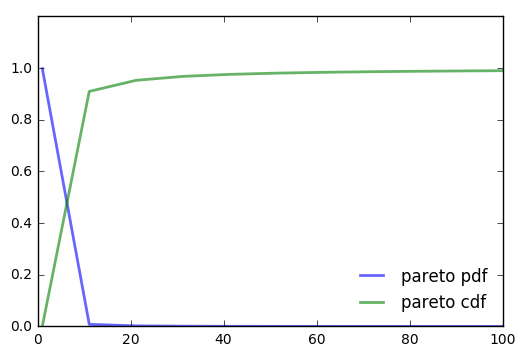

In [2]:
from scipy.stats import pareto
import matplotlib.pyplot as plt

#Plot en el notebook
%matplotlib inline

#Función de densidad de probabilidad
#Parámetro de forma (b en la ayuda de scipy, k en Wikipedia)
k = 1
x = np.linspace(pareto.ppf(0.001, k), pareto.ppf(0.999, k), 100)

#Probability Density Function
plt.plot(x, pareto.pdf(x, k), lw=2, alpha=0.6, label='pareto pdf')

#Frozen PDF
#rv = pareto(k)
#plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#Cumulative Distribution Function
plt.plot(x, pareto.cdf(x, k, loc=0, scale=1), lw=2, alpha=0.6, label='pareto cdf')
plt.legend(loc='best', frameon=False)

print("Percentil 80% k=1: " + str(pareto.ppf(0.80, 1)))
#print("Percentil 20% k=1: " + str(pareto.ppf(0.20, 1)))
#print("Percentil 99.9% k=1: " + str(pareto.ppf(0.999, 1))) -> 1000
#print("Percentil 95% k=1: " + str(pareto.ppf(0.96, 1))) -> 25
#Los PPF son los inversos de los valores CDF

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,k+0.2])

#Mathematically, the 80/20 rule is roughly followed by a power law distribution (also known as a Pareto distribution)
#for a particular set of parameters, and many natural phenomena have been shown empirically to exhibit such a distribution.

#Referencias
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto


** 3. Generación de datos - otras distribuciones **

Si no encontrásemos la distribución en las bibliotecas de ScyPy pero la
conocemos ("sabemos la fórmula"), siempre podemos generar los datos
aleatorios generando un array con los datos en el rango en que está definida, y
después tomando aleatoriamente un número de elementos de allí ("con
reemplazo").

Vamos a pensar si tenemos esta función f(t) definida por:

. 0, t < 0
. 2*t / (1 + t**2)**2, t>= 0


Se pide:
- Dibujar la función en el rango [0, 10].



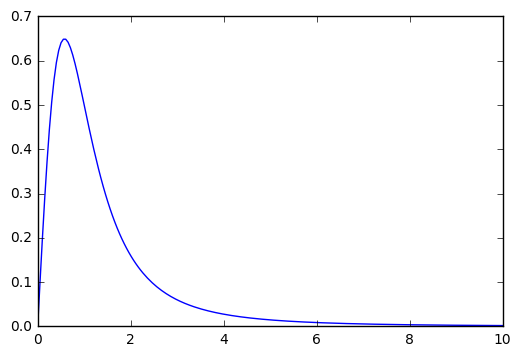

In [16]:
t = np.linspace(0, 10, num=200, endpoint=True)
f_t = (2 * t) / ((1 + t**2)**2)
plt.plot(t, f_t, label='f(t)')


- Generar una muestra aleatoria de la misma.
- Dibujar esa muestra y su histograma.

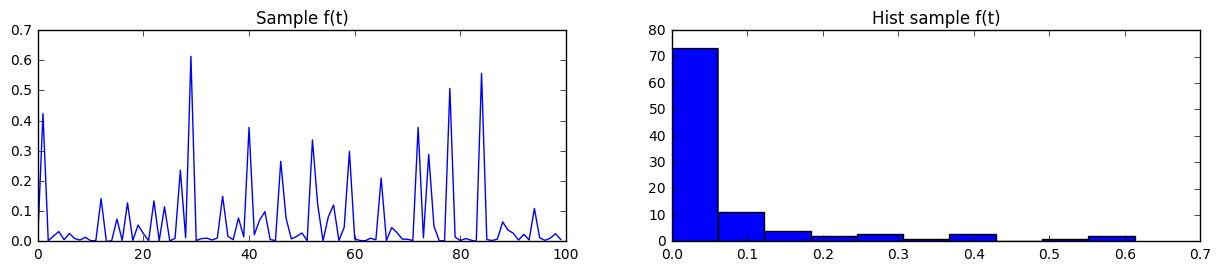

In [36]:
#Se emplea random.choice para obtener una muestra de la población (los valores definidos por f(t))
#con reemplazo empleando numpy

f_sample = np.random.choice(f_t, size=100, replace=True)
#Dibujo de la muestra
fig = plt.figure(figsize=(15, 6))
plt.subplot(221)
plt.plot(f_sample)
plt.title('Sample f(t)')

#Y del histograma
plt.subplot(222)
plt.hist(f_sample)
plt.title('Hist sample f(t)')

#http://stackoverflow.com/questions/29567583/random-list-with-replacement-from-python-list-of-lists
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html

** 4. Generación de datos censurados **

En las técnicas de análisis estadístico conocidas como ** "análisis de
supervivencia"** se considera el tiempo hasta un evento. Por ejemplo, en
enfermos de cáncer, sería el tiempo hasta el fallecimiento o al final del estudio.
Si alguno de los enfermos en estudio antes de fallecer abandona el estudio
(por ejemplo, emigra a otro país) decimos que el dato está "censurado" porque
tenemos la fecha en la que se fue, que es lógicamente inferior a la fecha
desconocida de su fallecimiento. También son datos "censurados" los tiempos
de los pacientes que al terminar el estudio aún siguen vivos.
Generar datos censurados sintéticos requiere por tanto dos pasos:
- Generar aleatorios con la distribución(-es) de los tiempos de fallecimiento.
- Decidir el tiempo en que termina el estudio y ajustar los tiempos a ese máximo.

Por otro lado, en la mayoría de los estudios se tiene dos grupos que se
comparan. Vamos a simular dos grupos de pacientes con diferente distribución
e influir datos censurados.

Se pide generar unos datos simulados de dos poblaciones de pacientes:

- Cuyo tiempo de supervivencia sigue una distribución exponencial en
ambos casos, pero con parámetros diferentes (por ejemplo, 12 y 2)
(Pista: Crear dos arrays de aleatorios, o un array con tuplas)
- En la que se mezclan aleatoriamente un número de unos u otros.
(Pista: utilizar la distribución uniform() e indexar una u otra de las series.)
- En la que finalmente, el estudio termina en el tiempo t=10.

(array([ 23.,  11.,  16.,   5.,   8.,   7.,   2.,   1.,   3.,  24.]),
 array([  0.01515534,   1.01363981,   2.01212427,   3.01060874,
          4.0090932 ,   5.00757767,   6.00606214,   7.0045466 ,
          8.00303107,   9.00151553,  10.        ]),
 <a list of 10 Patch objects>)

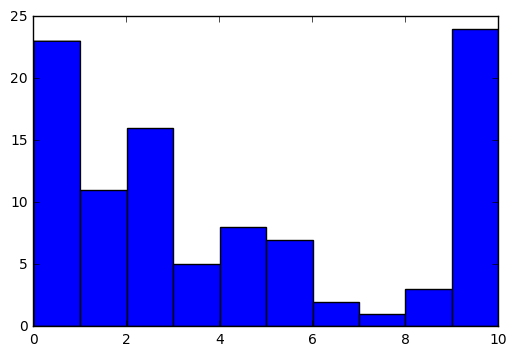

In [47]:
import numpy as np

#Generación de valores aleatorios de tiempos de fallecimiento
k = 100
survivors_12 = np.random.exponential(scale=12, size=k)
survivors_2 = np.random.exponential(scale=2, size=k)

survivors_mixed = []

for i in range(k):
    r = np.random.uniform()
    if r < 0.5:
        survivors_mixed.append(survivors_12[i])
    else:
        survivors_mixed.append(survivors_2[i])

#print(survivors_12)
#print(survivors_2)
#print(survivors_mixed)

#NOTA: no sé si la resolución es correcta.
#Ajuste de los que sobrepasan el máximo del tiempo a ese máximo de tiempo.
max_t = 10
survivors_adjust = []

for i in range(len(survivors_mixed)):
    if survivors_mixed[i] <= max_t:
        survivors_adjust.append(survivors_mixed[i])
    else:
        survivors_adjust.append(max_t)

plt.hist(survivors_adjust,bins=10)
#Se aprecia que gran cantidad "fallecerían" transcurrido t=10

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.exponential.html
